In [3]:
!pip install pandas==2.2.2 numpy==1.26.4 matplotlib==3.8.4 seaborn==0.13.2 scipy==1.13.1 statsmodels==0.14.2 pmdarima==2.0.4 prophet==1.1.5 plotly==5.22.0 streamlit==1.38.0


In [4]:
import pandas as pd
import numpy as np
# Load data with latin-1 encoding
data = pd.read_csv('/content/data.csv', encoding='latin-1')

# Drop rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Remove negative or zero quantities and prices
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Cap outliers
data = data[(data['Quantity'] <= 10000) & (data['UnitPrice'] <= 1000)]

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create time-based features
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek  # New feature: day of week

# Calculate TotalPrice
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Handle remaining missing values (e.g., Description)
data['Description'] = data['Description'].fillna('Unknown')

# Convert CustomerID to string
data['CustomerID'] = data['CustomerID'].astype(str)

# Save cleaned data
data.to_csv('cleaned_data.csv', index=False)
print("Data cleaning complete. Shape:", data.shape)

Data cleaning complete. Shape: (397861, 14)


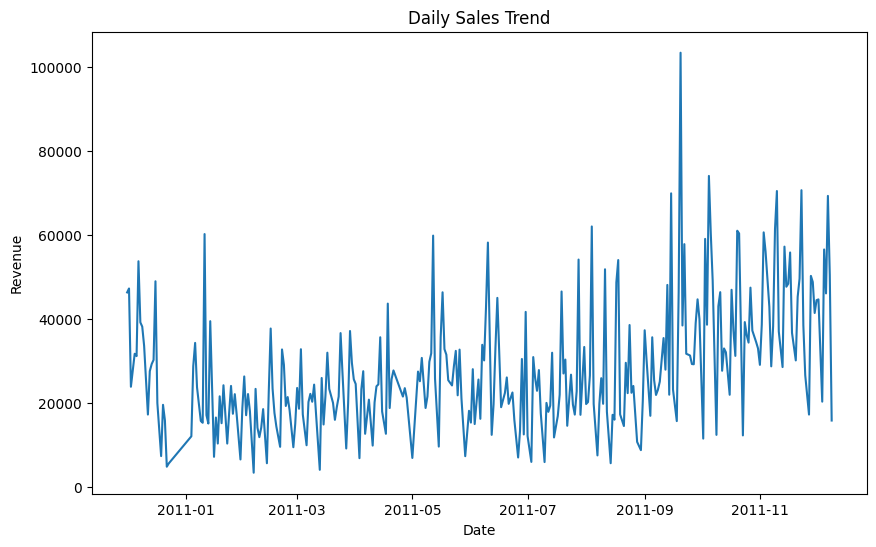

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned data
data = pd.read_csv('cleaned_data.csv', parse_dates=['InvoiceDate'])

# Daily sales trend
daily_sales = data.groupby(data['InvoiceDate'].dt.date)['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()



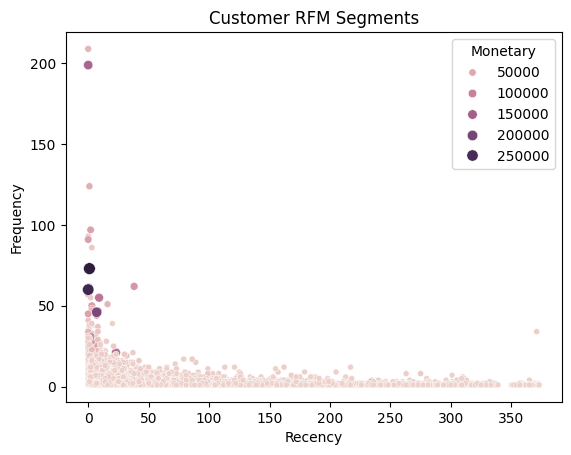

In [6]:
# RFM Analysis
today = data['InvoiceDate'].max()
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (unique invoices)
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Visualize RFM
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Monetary', size='Monetary')
plt.title("Customer RFM Segments")
plt.show()

# Save RFM data
rfm.to_csv('rfm_data.csv')

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Load cleaned data
data = pd.read_csv('cleaned_data.csv', parse_dates=['InvoiceDate'])
print("Data loaded. Shape:", data.shape)


Data loaded. Shape: (397861, 14)


Actual Sales Stats: count       374.000000
mean      27145.954345
std       14824.719956
min        3457.110000
25%       17326.750000
50%       23921.710000
75%       33843.765000
max      103435.810000
Name: TotalPrice, dtype: float64
NaN in ts_log: 0
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=6.02 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=667.468, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=547.155, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=510.089, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=665.477, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=542.714, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=3.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=492.603, Time=0.62 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=602.865, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=inf, Time=1.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=484.571, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=536.832, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[7] intercept   : AIC=500.723, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=inf, Time=1.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,0)[7] intercept   : AIC=inf, Time=1.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,0)[7] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,1,2)(1,0,0)[7]             : AIC=482.571, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[7]             : AIC=534.836, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[7]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,2)(0,0,1)[7]             : AIC=498.729, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[7]             : AIC=490.605, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[7]             : AIC=472.658, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=538.249, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[7]             : AIC=inf, Time=2.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[7]             : AIC=494.884, Time=1.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[7]             : AIC=475.383, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[7]             : AIC=475.832, Time=0.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,0)[7]             : AIC=477.532, Time=0.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,0)[7]             : AIC=475.581, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[7]             : AIC=474.119, Time=0.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,0)[7]             : AIC=476.574, Time=1.01 sec

Best model:  ARIMA(1,1,2)(1,0,0)[7]          
Total fit time: 27.328 seconds
Best model: (1, 1, 2), (1, 0, 0, 7)
                                    SARIMAX Results                                     
Dep. Variable:                       TotalPrice   No. Observations:                  374
Model:             ARIMA(1, 1, 2)x(1, 0, [], 7)   Log Likelihood                -231.329
Date:                          Fri, 04 Apr 2025   AIC                            472.658
Time:                                  08:25:50   BIC                            492.266
Sample:                              12-01-2010   HQIC                           480.444
                                   - 12-09-2011                                         
Covariance Type:                         robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

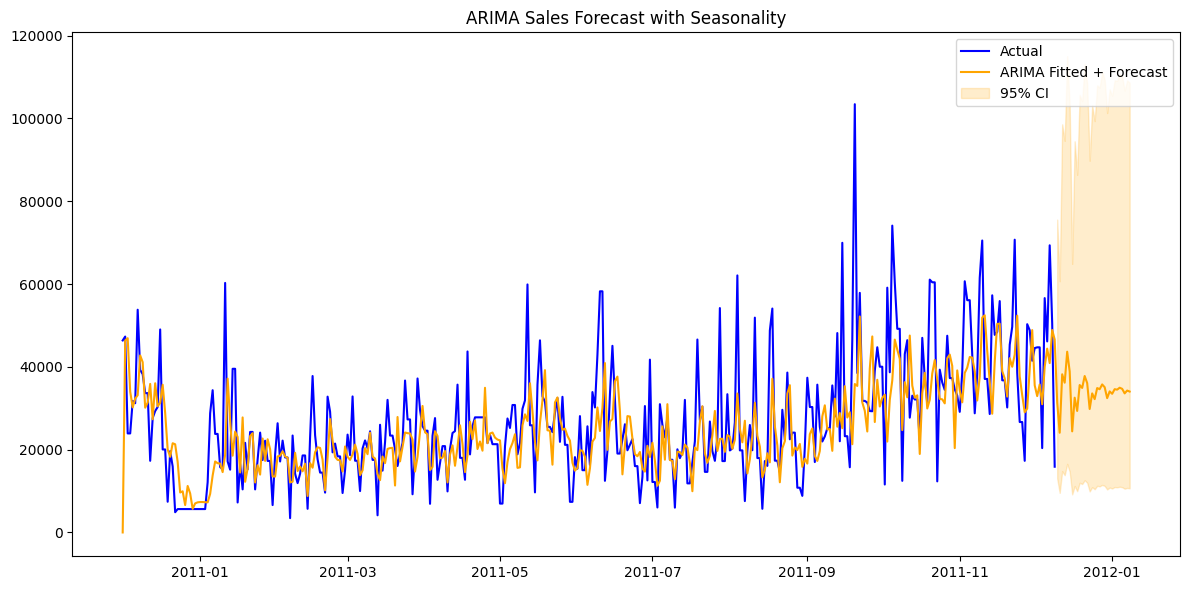

ARIMA full series saved to arima_forecast.csv


In [8]:
# Prepare daily sales data
ts = data.groupby(data['InvoiceDate'].dt.date)['TotalPrice'].sum()
ts.index = pd.to_datetime(ts.index)
ts = ts.asfreq('D').ffill()  # Forward fill missing days
print("Actual Sales Stats:", ts.describe())

# Log transform
ts_log = np.log(ts + 1)
print("NaN in ts_log:", ts_log.isna().sum())

# Fit seasonal ARIMA on full data
model = auto_arima(ts_log, seasonal=True, m=7, trace=True, suppress_warnings=True,
                   max_p=3, max_d=1, max_q=3, max_P=1, max_D=1, max_Q=1)
print(f"Best model: {model.order}, {model.seasonal_order}")

arima_model = ARIMA(ts_log, order=model.order, seasonal_order=model.seasonal_order)
arima_fit = arima_model.fit(cov_type='robust')
print(arima_fit.summary())

# Fitted values
fitted_log = arima_fit.fittedvalues
fitted_log.index = ts.index

# Forecast 30 days
last_date = ts.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=31, freq='D')[1:]
forecast_obj = arima_fit.get_forecast(steps=30)
forecast_log = forecast_obj.predicted_mean
forecast_log.index = forecast_dates
conf_int_log = forecast_obj.conf_int(alpha=0.05)
conf_int_log.index = forecast_dates

# Combine and clip
combined_log = pd.concat([fitted_log, forecast_log])
max_log_value = ts_log.max()
combined_log_clipped = combined_log.clip(upper=max_log_value)
arima_combined = np.exp(combined_log_clipped) - 1
arima_combined = arima_combined.clip(lower=0)

# Transform confidence intervals
conf_int_lower = (np.exp(conf_int_log['lower TotalPrice']) - 1).clip(lower=0)
conf_int_upper = (np.exp(conf_int_log['upper TotalPrice']) - 1).clip(lower=0)

# Debug
print("Combined Stats:", arima_combined.describe())
print("Forecast Stats:", arima_combined[forecast_dates].describe())
print("Confidence Intervals (last 5):", pd.DataFrame({'lower': conf_int_lower.tail(), 'upper': conf_int_upper.tail()}))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Actual', color='blue')
plt.plot(arima_combined, label='ARIMA Fitted + Forecast', color='orange')
plt.fill_between(forecast_dates, conf_int_lower, conf_int_upper, color='orange', alpha=0.2, label='95% CI')
plt.title("ARIMA Sales Forecast with Seasonality")
plt.legend()
plt.tight_layout()
plt.show()

# Save full series to CSV
arima_full_df = pd.DataFrame({
    'ds': arima_combined.index,
    'yhat': arima_combined,
    'yhat_lower': np.nan,
    'yhat_upper': np.nan
})
arima_full_df.loc[forecast_dates, 'yhat_lower'] = conf_int_lower
arima_full_df.loc[forecast_dates, 'yhat_upper'] = conf_int_upper
arima_full_df.to_csv('arima_forecast.csv', index=False)
print("ARIMA full series saved to arima_forecast.csv")

Data loaded. Shape: (397861, 14)
Time series prepared. Shape: (305, 2)
Train size: 275, Test size: 30


DEBUG:cmdstanpy:input tempfile: /tmp/tmp966y8y09/qldbxb0n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp966y8y09/1_f0yx2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91472', 'data', 'file=/tmp/tmp966y8y09/qldbxb0n.json', 'init=/tmp/tmp966y8y09/1_f0yx2g.json', 'output', 'file=/tmp/tmp966y8y09/prophet_modelwqo6d3j9/prophet_model-20250404082609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:26:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:26:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp966y8y09/5sfmyjq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp966y8y09/n56wzu8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Test RMSE: 17948.23
Prophet forecast saved.


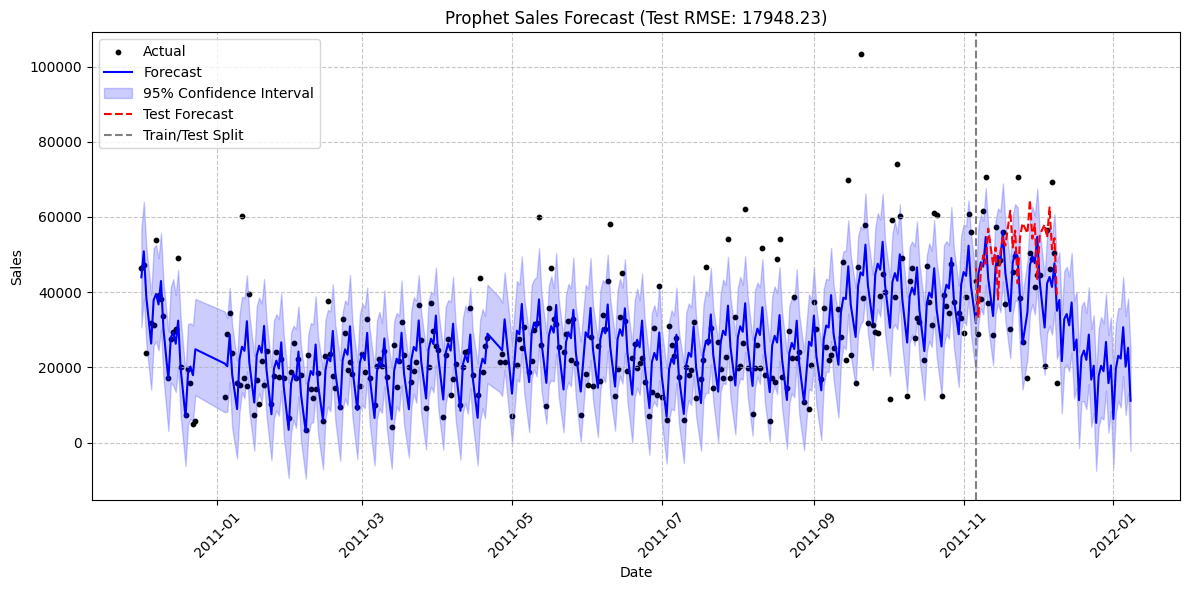

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

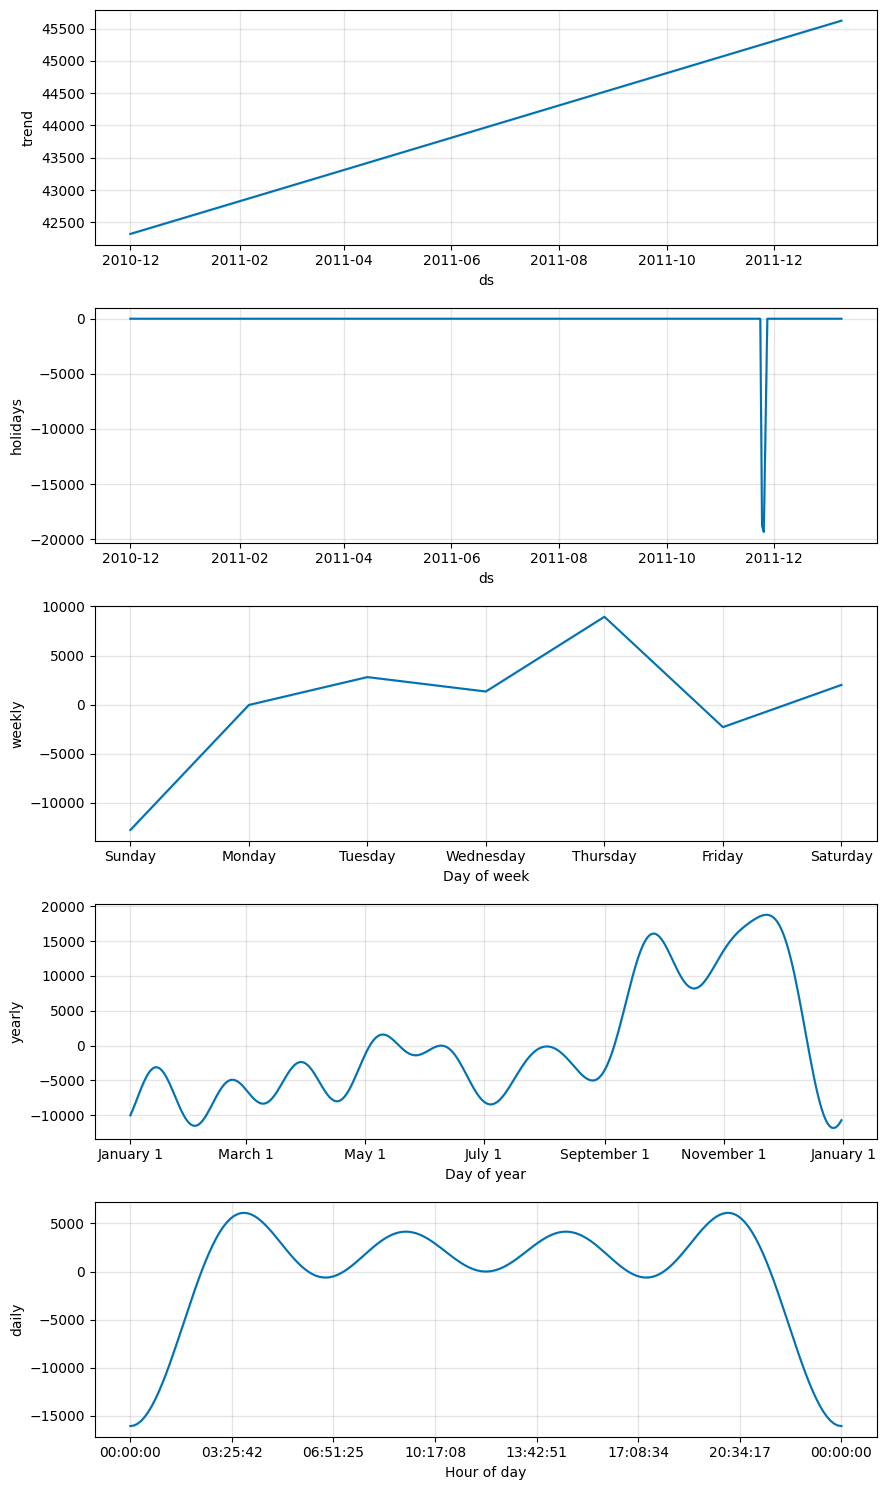

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

try:
    # Load cleaned data
    data = pd.read_csv('cleaned_data.csv', parse_dates=['InvoiceDate'])
    print("Data loaded. Shape:", data.shape)

    # Prepare data for Prophet
    ts = data.groupby(data['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()
    ts.columns = ['ds', 'y']
    print("Time series prepared. Shape:", ts.shape)

    # Define holidays (expanded for multiple years)
    holidays = pd.DataFrame({
        'holiday': ['Christmas', 'Christmas', 'New Year', 'New Year', 'Black Friday', 'Black Friday'],
        'ds': pd.to_datetime(['2010-12-25', '2011-12-25', '2011-01-01', '2012-01-01',
                              '2010-11-26', '2011-11-25']),
        'lower_window': -1,  # 1 day before
        'upper_window': 1    # 1 day after
    })

    # Split into train and test (last 30 days for test)
    train_size = len(ts) - 30
    train, test = ts[:train_size], ts[train_size:]
    print(f"Train size: {len(train)}, Test size: {len(test)}")

    # Train Prophet model
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        holidays=holidays,
        holidays_prior_scale=20,
        changepoint_prior_scale=0.05,  # Adjust for flexibility in trend changes
        seasonality_prior_scale=10     # Default, but adjustable
    )
    model.fit(train)

    # Evaluate on test set
    future_test = model.make_future_dataframe(periods=len(test))
    forecast_test = model.predict(future_test)
    test_pred = forecast_test.tail(len(test))['yhat']
    test_rmse = np.sqrt(mean_squared_error(test['y'], test_pred))
    print(f"Test RMSE: {test_rmse:.2f}")

    # Refit on full data for final forecast
    model_full = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        holidays=holidays,
        holidays_prior_scale=20,
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=10
    )
    model_full.fit(ts)

    # Forecast next 30 days
    future = model_full.make_future_dataframe(periods=30)
    forecast = model_full.predict(future)

    # Save forecast
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('prophet_forecast.csv', index=False)
    print("Prophet forecast saved.")

    # Enhanced plot
    plt.figure(figsize=(12, 6))
    plt.scatter(ts['ds'], ts['y'], color='black', label='Actual', s=10)
    plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Forecast')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                     color='blue', alpha=0.2, label='95% Confidence Interval')
    plt.plot(test['ds'], test_pred, color='red', linestyle='--', label='Test Forecast')
    plt.axvline(ts['ds'].iloc[train_size], color='gray', linestyle='--', label='Train/Test Split')
    plt.title(f"Prophet Sales Forecast (Test RMSE: {test_rmse:.2f})")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Optional: Plot components (trend, weekly, yearly, holidays)
    fig = model_full.plot_components(forecast)
    plt.show()

except FileNotFoundError:
    print("Error: cleaned_data.csv not found")
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [10]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime, timedelta
import numpy as np
from sklearn.metrics import mean_squared_error

@st.cache_data
def load_data():
    try:
        data = pd.read_csv('cleaned_data.csv', parse_dates=['InvoiceDate'])
        arima_forecast = pd.read_csv('arima_forecast.csv', parse_dates=['ds'])
        prophet_forecast = pd.read_csv('prophet_forecast.csv', parse_dates=['ds'])
    except FileNotFoundError as e:
        st.error(f"Error loading data: {e}. Please ensure all files are present.")
        return None, None, None, None

    max_date = data['InvoiceDate'].max()
    date_shift = datetime.now() - max_date
    data['InvoiceDate'] = data['InvoiceDate'] + date_shift
    arima_forecast['ds'] = arima_forecast['ds'] + date_shift
    prophet_forecast['ds'] = prophet_forecast['ds'] + date_shift
    return data, arima_forecast, prophet_forecast, date_shift

data, arima_forecast, prophet_forecast, date_shift = load_data()

if data is None or arima_forecast is None or prophet_forecast is None:
    st.error("Data loading failed. Please check the error message above.")
else:
    st.sidebar.header("Filters")
    col1, col2 = st.sidebar.columns(2)
    date_range = col1.date_input("Select Date Range for Metrics",
                                 [datetime.now() - timedelta(days=30), datetime.now()],
                                 min_value=data['InvoiceDate'].min().date(),
                                 max_value=data['InvoiceDate'].max().date())
    country = col2.multiselect("Select Country", options=data['Country'].unique(),
                               default=['United Kingdom'])
    forecast_period = st.sidebar.slider("Forecast Period (days)", 7, 60, 30)
    days = st.sidebar.slider("Metrics Period (days)", 1, 30, 7)
    show_original_dates = st.sidebar.checkbox("Show Original Dates (2010-2012)", value=False)
    plot_date_range = st.sidebar.date_input("Select Plot Date Range",
                                            [data['InvoiceDate'].max().date() - timedelta(days=90), data['InvoiceDate'].max().date()],
                                            min_value=data['InvoiceDate'].min().date(),
                                            max_value=data['InvoiceDate'].max().date())

    filtered_data = data[(data['InvoiceDate'].dt.date >= date_range[0]) &
                         (data['InvoiceDate'].dt.date <= date_range[1]) &
                         (data['Country'].isin(country))]

    st.title("E-Commerce Sales Dashboard")
    st.header("Real-Time Sales Metrics")
    col1, col2, col3 = st.columns(3)
    recent_data = filtered_data[filtered_data['InvoiceDate'] >= datetime.now() - timedelta(days=days)]
    prev_data = filtered_data[(filtered_data['InvoiceDate'] >= datetime.now() - timedelta(days=days*2)) &
                              (filtered_data['InvoiceDate'] < datetime.now() - timedelta(days=days))]
    revenue = recent_data['TotalPrice'].sum()
    orders = recent_data['InvoiceNo'].nunique()
    avg_order_value = revenue / orders if orders > 0 else 0
    prev_revenue = prev_data['TotalPrice'].sum()
    prev_orders = prev_data['InvoiceNo'].nunique()
    prev_avg_order = prev_revenue / prev_orders if prev_orders > 0 else 0
    col1.metric("Revenue (Last {} Days)".format(days), f"${revenue:,.2f}", f"${revenue - prev_revenue:,.2f}")
    col2.metric("Order Volume", orders, orders - prev_orders)
    col3.metric("Avg Order Value", f"${avg_order_value:,.2f}", f"${avg_order_value - prev_avg_order:,.2f}")
    st.caption(f"Metrics based on the last {days} days of filtered data. Filtered data points: {len(filtered_data)}")

    st.header("Sales Trend & Forecasts")
    daily_sales_full = data.groupby(data['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()
    daily_sales_full.columns = ['ds', 'y']
    daily_sales_full['ds'] = pd.to_datetime(daily_sales_full['ds'])
    daily_sales = filtered_data.groupby(filtered_data['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()
    daily_sales.columns = ['ds', 'y']
    daily_sales['ds'] = pd.to_datetime(daily_sales['ds'])

    if show_original_dates:
        daily_sales_full['ds'] = daily_sales_full['ds'] - date_shift
        daily_sales['ds'] = daily_sales['ds'] - date_shift
        arima_forecast['ds'] = arima_forecast['ds'] - date_shift
        prophet_forecast['ds'] = prophet_forecast['ds'] - date_shift

    plot_start = pd.Timestamp(plot_date_range[0])
    plot_end = pd.Timestamp(plot_date_range[1])
    daily_sales_full = daily_sales_full[(daily_sales_full['ds'] >= plot_start) &
                                        (daily_sales_full['ds'] <= plot_end)]
    last_actual_date = daily_sales_full['ds'].max()
    forecast_end = last_actual_date + pd.Timedelta(days=forecast_period)
    arima_full = arima_forecast[(arima_forecast['ds'] >= plot_start) &
                                (arima_forecast['ds'] <= forecast_end)]
    prophet_future = prophet_forecast[(prophet_forecast['ds'] >= plot_start) &
                                      (prophet_forecast['ds'] <= forecast_end)]
    if daily_sales_full.empty:
        st.warning("No actual sales data in the selected plot range.")

    with st.expander("Debug Info"):
        st.write(f"ARIMA Full Rows: {len(arima_full)}, Prophet Future Rows: {len(prophet_future)}")
        st.write(f"Last Actual Date: {last_actual_date}")
        st.write(f"ARIMA Date Range: {arima_full['ds'].min()} to {arima_full['ds'].max()}")
        st.write(f"Prophet Date Range: {prophet_future['ds'].min()} to {prophet_future['ds'].max()}")
        st.write(f"NaN in arima_full yhat_lower: {arima_full['yhat_lower'].isna().sum()}")
        st.write(f"NaN in prophet_future yhat_lower: {prophet_future['yhat_lower'].isna().sum()}")
        st.write(f"ARIMA yhat Stats: {arima_full['yhat'].describe()}")
        st.write(f"Prophet yhat Stats: {prophet_future['yhat'].describe()}")
        st.write(f"Daily Sales Full y Stats: {daily_sales_full['y'].describe()}")



    fig = go.Figure()
    fig.add_trace(go.Scatter(x=daily_sales_full['ds'], y=daily_sales_full['y'], mode='markers', name='Actual', marker=dict(color='#000000', size=4)))
    if not daily_sales_full.empty:
        peak_date = daily_sales_full.loc[daily_sales_full['y'].idxmax(), 'ds']
        peak_value = daily_sales_full['y'].max()
        fig.add_annotation(x=peak_date, y=peak_value, text=f"Peak: ${peak_value:,.0f}", showarrow=True, arrowhead=1)
        trend = daily_sales_full['y'].rolling(window=7, center=True).mean()
        fig.add_trace(go.Scatter(x=daily_sales_full['ds'], y=trend, mode='lines', name='Actual Trend', line=dict(color='gray', dash='dot')))
    if not arima_full.empty and arima_full['yhat'].notna().all():
        fig.add_trace(go.Scatter(x=arima_full['ds'], y=arima_full['yhat'], mode='lines', name='ARIMA Fitted + Forecast', line=dict(color='#FF7F0E', width=2)))
        fig.add_trace(go.Scatter(x=arima_full['ds'], y=arima_full['yhat_lower'], mode='lines', name='ARIMA 95% CI Lower', line=dict(color='#FF7F0E', width=0)))
        fig.add_trace(go.Scatter(x=arima_full['ds'], y=arima_full['yhat_upper'], mode='lines', line=dict(color='#FF7F0E', width=0),
                                 fill='tonexty', name='ARIMA 95% CI', fillcolor='rgba(255, 127, 14, 0.2)'))
    if not prophet_future.empty and prophet_future['yhat'].notna().all():
        fig.add_trace(go.Scatter(x=prophet_future['ds'], y=prophet_future['yhat'], mode='lines', name='Prophet Forecast', line=dict(color='#1F77B4', width=2)))
        fig.add_trace(go.Scatter(x=prophet_future['ds'], y=prophet_future['yhat_lower'], mode='lines', name='Prophet 95% CI Lower', line=dict(color='#1F77B4', width=0)))
        fig.add_trace(go.Scatter(x=prophet_future['ds'], y=prophet_future['yhat_upper'], mode='lines', line=dict(color='#1F77B4', width=0),
                                 fill='tonexty', name='Prophet 95% CI', fillcolor='rgba(31, 119, 180, 0.2)'))

    show_arima = st.checkbox("Show ARIMA Forecast", value=True)
    show_prophet = st.checkbox("Show Prophet Forecast", value=True)
    show_ci = st.checkbox("Show Confidence Intervals", value=True)
    for trace in fig.data:
        if trace.name and isinstance(trace.name, str):
            if 'ARIMA' in trace.name:
                trace.visible = show_arima
                if 'CI' in trace.name and not show_ci:
                    trace.visible = False
            elif 'Prophet' in trace.name:
                trace.visible = show_prophet
                if 'CI' in trace.name and not show_ci:
                    trace.visible = False
        else:
            st.warning(f"Trace with no name found: {trace}")

    fig.update_layout(
        title="Sales Trend & Forecasts",
        xaxis_title="Date",
        yaxis_title="Sales ($)",
        legend_title="Legend",
        hovermode="x unified",
        template="plotly_white",
        yaxis=dict(showgrid=True, gridcolor='lightgray'),
        xaxis=dict(rangeslider=dict(visible=True), type="date", range=[plot_start, forecast_end]),
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )
    if not daily_sales_full.empty:
        last_date_ms = last_actual_date.timestamp() * 1000
        fig.add_vline(x=last_date_ms, line_dash="dash", line_color="gray", annotation_text="Forecast Start", annotation_position="top left")
    st.plotly_chart(fig, use_container_width=True)

    st.subheader("Forecast Performance")
    if not daily_sales_full.empty and not arima_full.empty and not prophet_future.empty:
        common_dates = daily_sales_full['ds'].isin(arima_full['ds']).index
        actuals = daily_sales_full.loc[common_dates, 'y']
        arima_preds = arima_full.set_index('ds').reindex(actuals.index)['yhat'].fillna(0)
        prophet_preds = prophet_future.set_index('ds').reindex(actuals.index)['yhat'].fillna(0)
        arima_rmse = np.sqrt(mean_squared_error(actuals, arima_preds)) if len(actuals) > 0 else float('nan')
        prophet_rmse = np.sqrt(mean_squared_error(actuals, prophet_preds)) if len(actuals) > 0 else float('nan')
        st.write(f"ARIMA RMSE: {arima_rmse:,.2f}")
        st.write(f"Prophet RMSE: {prophet_rmse:,.2f}")
    else:
        st.warning("Insufficient data for RMSE calculation.")

    st.subheader("Forecast Data")
    combined_df = daily_sales_full.merge(arima_full[['ds', 'yhat']].rename(columns={'yhat': 'ARIMA'}), on='ds', how='outer') \
                                 .merge(prophet_future[['ds', 'yhat']].rename(columns={'yhat': 'Prophet'}), on='ds', how='outer')
    st.dataframe(combined_df)

    st.download_button("Download Plot as HTML", fig.to_html(), "sales_forecast.html", "text/html")
    st.download_button("Download Forecast Data", combined_df.to_csv(index=False), "forecast_data.csv", "text/csv")

    st.header("Notes")
    st.caption("Dates are shifted to simulate real-time data from the original 2010-2012 timeline.")

Writing dashboard.py


In [11]:
# Install dependencies
!pip install streamlit pyngrok -q
print("Streamlit and pyngrok installed.")

# Import required libraries
from pyngrok import ngrok
import time
import os
import subprocess


# Set your ngrok auth token (replace with your actual token)
ngrok.set_auth_token('2tZ6mqHFZ9n2B4HsTOzAPVA3Jnw_6qB1RFncPLxV8kcYUxNcJ')

# Terminate any existing ngrok tunnels
ngrok.kill()

# Start Streamlit app
port = 8501
process = subprocess.Popen(["streamlit", "run", "/content/dashboard.py", "--server.port", str(port)])

# Start ngrok tunnel
public_url = ngrok.connect(port)
print(f"Streamlit URL: {public_url}")

# Keep the notebook running
import time
time.sleep(60)  # Adjust as needed

Streamlit and pyngrok installed.
Streamlit URL: NgrokTunnel: "https://cca4-130-211-244-83.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!ls /content/